In [ ]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab08.ok')

# Lab 8: Correlation, Variance of Sample Means

Welcome to Lab 8!

In today's lab, we will learn about [the variance of sample means](https://www.inferentialthinking.com/chapters/14/5/variability-of-the-sample-mean.html) as well as ways to understand and quantify [the association between two variables](https://www.inferentialthinking.com/chapters/15/1/correlation.html).

In [3]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
from client.api.notebook import Notebook
ok = Notebook('lab08.ok')
_ = ok.submit()

Assignment: Correlation and Variance of Sample Means
OK, version v1.12.5



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab08.ipynb'.
Submit... 0.0% complete
Could not submit: Late Submission of cal/data8/sp19/lab08
Backup... 100% complete



# 1. How Faithful is Old Faithful? 

Old Faithful is a geyser in Yellowstone National Park that is famous for eruption on a fairly regular schedule. Run the cell below to see Old Faithful in action!

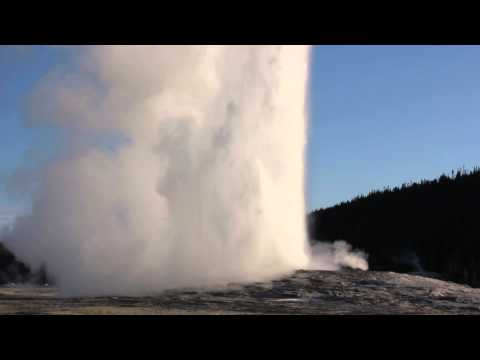

In [4]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  Whenever there is a long eruption, it usually followed by an even longer wait before the next eruption.

If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park in the meantime instead of waiting by the geyser.  Today, we will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption.  It includes the following columns:
- `duration`: Eruption duration, in minutes.
- `wait`: Time between this eruption and the next, also in minutes.

Run the next cell to load the dataset.

In [5]:
faithful = Table.read_table("faithful.csv")
faithful

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


We would like to use linear regression to make predictions, but that won't work well if the data aren't roughly linearly related.  To check that, we should look at the data.

**Question 1.1.** Make a scatter plot of the data.  It's conventional to put the column we want to predict on the vertical axis and the other column on the horizontal axis.

<!--
BEGIN QUESTION
name: q1_1
-->

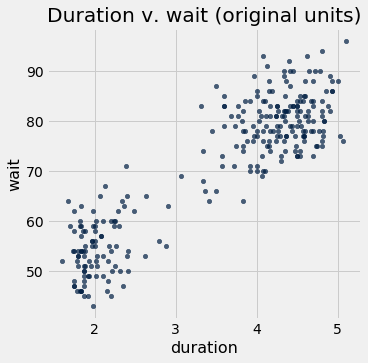

In [6]:
faithful.scatter("duration")
plots.title('Duration v. wait (original units)');

**Question 1.2.** Are eruption duration and waiting time roughly linearly related based on the scatter plot above? Is this relationship positive?

<!--
BEGIN QUESTION
name: q1_2
-->

Yes, they are roughly linearly related. We see clusters in the scatterplot. There are two broad clusters around shorter erruptions and longer ones. The relationship however is positive as they roughly fall along a line. This means that longer eruptions have longer waiting times.

We're going to continue with the assumption that they are linearly related, so it's reasonable to use linear regression to analyze this data.

We'd next like to plot the data in standard units. If you don't remember the definition of standard units, textbook section [14.2](https://www.inferentialthinking.com/chapters/14/2/Variability.html#standard-units) might help!

**Question 1.3.** Compute the mean and standard deviation of the eruption durations and waiting times.  **Then** create a table called `faithful_standard` containing the eruption durations and waiting times in standard units.  The columns should be named `duration (standard units)` and `wait (standard units)`.

<!--
BEGIN QUESTION
name: q1_3
-->

In [10]:
duration_mean = np.average(faithful.column('duration'))
duration_std = np.std(faithful.column('duration'))
wait_mean = np.mean(faithful.column("wait"))
wait_std = np.std(faithful.column("wait"))

faithful_standard = Table().with_columns(
    "duration (standard units)", (faithful.column("duration") - duration_mean) / duration_std,
    "wait (standard units)", (faithful.column("wait") - wait_mean) / wait_std)
faithful_standard

duration (standard units),wait (standard units)
0.0984989,0.597123
-1.48146,-1.24518
-0.135861,0.228663
-1.0575,-0.655644
0.917443,1.03928
-0.530851,-1.17149
1.06403,1.26035
0.0984989,1.03928
-1.3498,-1.46626
0.756814,1.03928


In [11]:
ok.grade("q1_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.4.** Plot the data again, but this time in standard units.

<!--
BEGIN QUESTION
name: q1_4
-->

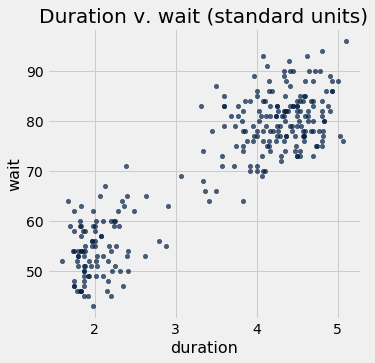

In [13]:
faithful.scatter("duration")
plots.title('Duration v. wait (standard units)');

You'll notice that this plot looks the same as the last one!  However, the data and axes are scaled differently.  So it's important to read the ticks on the axes.

**Question 1.5.** Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

1. -1
2. 0
3. 1

Assign `correlation` to the number corresponding to your guess.

<!--
BEGIN QUESTION
name: q1_5
-->

In [18]:
correlation = 3

In [19]:
ok.grade("q1_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.6.** Compute the correlation `r`.  

*Hint:* Use `faithful_standard`.  Section [15.1](https://www.inferentialthinking.com/chapters/15/1/Correlation.html#calculating-r) explains how to do this.


<!--
BEGIN QUESTION
name: q1_6
-->

In [21]:
r = np.mean(faithful_standard.column(0) * faithful_standard.column(1))
r

0.9008111683218132

In [22]:
ok.grade("q1_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# 2. Variability of the Sample Mean

By the [Central Limit Theorem](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html), the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher and some are lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly. Formally, probability theory shows that the sample mean is an **unbiased estimate** of the population mean.

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the [variability of the sample mean](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) and develop a relation between the variability and the sample size. For the remainder of this lab, we will use the abbreviation "SD" to refer to "standard deviation."

Let's take a look at the salaries of employees of the City of San Francisco in 2014. The mean salary reported by the city government was about $75,463.92.

In [23]:
salaries = Table.read_table('sf_salaries_2014.csv').select("salary")
salaries

salary
471953
390112
339654
326717
326233
344187
311299
310161
335485
329391


In [24]:
salary_mean = np.mean(salaries.column('salary'))
print('Mean salary of San Francisco city employees in 2014: ', salary_mean)

Mean salary of San Francisco city employees in 2014:  75463.91814023031


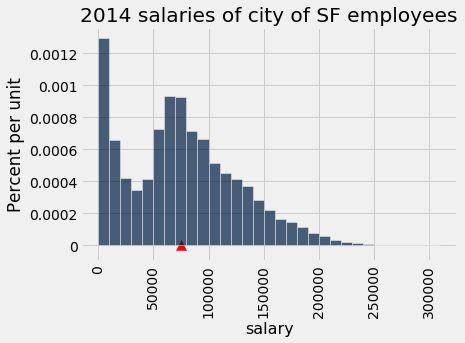

In [25]:
salaries.hist('salary', bins=np.arange(0, 300000+10000*2, 10000))
plots.scatter(salary_mean, 0, marker='^', color='red', s=100);
plots.title('2014 salaries of city of SF employees');

Clearly, the population does not follow a normal distribution. Keep that in mind as we progress through these exercises.

Let's take random samples *with replacement* and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

**Question 2.1.** Define a function `resampled_mean`. It should take as arguments the name of a table, the label of the column containing the variable, and a sample size. It should sample with replacement from the table and return the mean of the sample.

<!--
BEGIN QUESTION
name: q2_1
-->

In [26]:
def resampled_mean(table, label, sample_size):
    new_sample = table.sample(sample_size)
    new_sample_mean = np.average(new_sample.column(label))
    return new_sample_mean

In [27]:
ok.grade("q2_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.2.** Use `resampled_means` to define a function `simulate_sample_mean`. The arguments are the name of the table, the label of the column containing the variable, the sample size, and the number of simulations.

The function should sample with replacement from the table and calculate the mean of each sample. It should save the sample means in an array called `means`. The remaining code in the function displays an empirical histogram of the sample means.

<!--
BEGIN QUESTION
name: q2_2
-->

In [28]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in np.arange(repetitions):
        new_sample_mean = resampled_mean(table,label,sample_size)
        means = np.append(means,new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))
    return np.std(means)

Verify with your neighbor or TA that you've implemented the above function correctly. If you haven't implemented it correctly, the rest of the lab won't work properly, so this step is crucial.

 In the following cell, we will create a sample of size 100 from `salaries` and graph it using our new `simulate_sample_mean` function.

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75465.98348273999
Population SD: 51697.0349864653
SD of sample means: 5126.049251190718


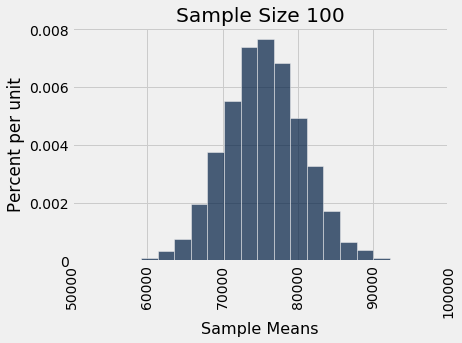

In [29]:
simulate_sample_mean(salaries, 'salary', 100, 10000) 
plots.xlim(50000, 100000);

**Question 2.3.** Simulate the mean of a random sample of 400 salaries and 625 salaries, respectively. In each case, perform 10,000 repetitions of each of these processes. Don't worry about the `plots.xlim` line – it just makes sure that all of the plots have the same x-axis. 

<!--
BEGIN QUESTION
name: q2_3
-->

Sample size:  400
Population mean: 75463.91814023031
Average of sample means:  75482.4706507425
Population SD: 51697.0349864653
SD of sample means: 2575.050998699082


Sample size:  625
Population mean: 75463.91814023031
Average of sample means:  75519.5976711408
Population SD: 51697.0349864653
SD of sample means: 2058.247120966861


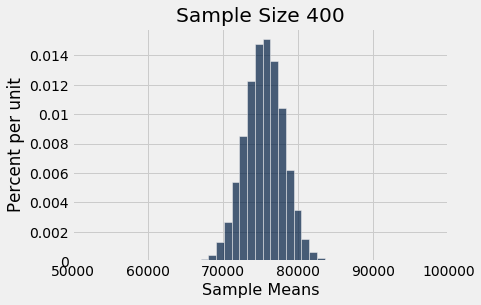

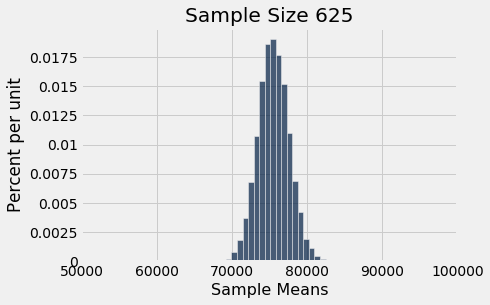

In [30]:
simulate_sample_mean(salaries, 'salary', 400, 10000)
plots.xlim(50000, 100000);
print('\n')
simulate_sample_mean(salaries, 'salary', 625, 10000)
plots.xlim(50000, 100000);

**Question 2.4.** Assign `q2_4` to a list of numbers corresponding to true statement(s) about the plots from 2.3.

1. We see the Central Limit Theorem (CLT) in action because the distributions of the sample means are bell-shaped.
2. We see the Law of Averages in action because the distributions of the sample means look like the distribution of the population.
3. One of the conditions for CLT is that we have to draw a small random sample with replacement from the population.
4. One of the conditions for CLT is that we have to draw a large random sample with replacement from the population.
5. One of the conditions for CLT is that the population must be normally distributed.
6. Both plots in 2.3 are roughly centered around the population mean.
7. Both plots in 2.3 are roughly centered around the mean of a particular sample.
8. The distribution of sample means for sample size 625 has less variability than the distribution of sample means for sample size 400.
9. The distribution of sample means for sample size 625 has more variability than the distribution of sample means for sample size 400.

<!--
BEGIN QUESTION
name: q2_4
-->

In [35]:
q2_4 = [1,4,6,8]

In [36]:
ok.grade("q2_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.5.** Assign the variable `bootstrap_sampled_SD` to the integer corresponding to your answer to the following question:

When I increase the number of bootstrap samples that I take, for a fixed sample size, the SD of my sample mean will...

1. Increase
2. Decrease
3. Stay about the same
4. Vary widly

<!--
BEGIN QUESTION
name: q2_5
-->

In [37]:
bootstrap_sampled_SD = 3

In [38]:
ok.grade("q2_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Below, we'll look at what happens when we take a fixed sample, then bootstrap from it with different numbers of resamples. How does the distribution of the resampled means change?

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75317.2042906
Population SD: 51697.0349864653
SD of sample means: 5402.794055300018


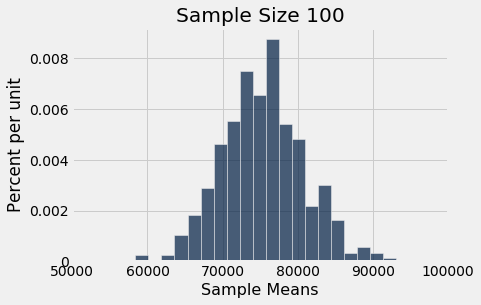

In [39]:
simulate_sample_mean(salaries, 'salary', 100, 500)
plots.xlim(50000, 100000);

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75357.38307030001
Population SD: 51697.0349864653
SD of sample means: 5122.214752913259


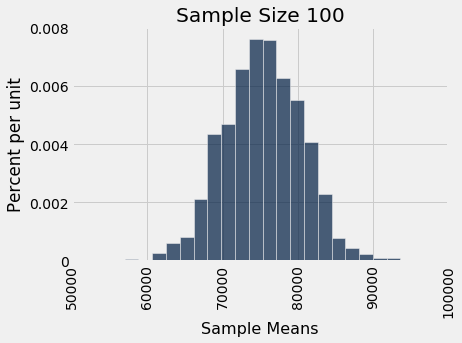

In [40]:
simulate_sample_mean(salaries, 'salary', 100, 1000)
plots.xlim(50000, 100000);

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75469.18343674
Population SD: 51697.0349864653
SD of sample means: 5093.39909573918


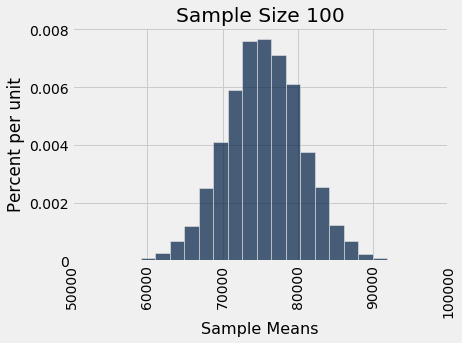

In [41]:
simulate_sample_mean(salaries, 'salary', 100, 5000)
plots.xlim(50000, 100000);

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75453.16759068999
Population SD: 51697.0349864653
SD of sample means: 5167.6716961183865


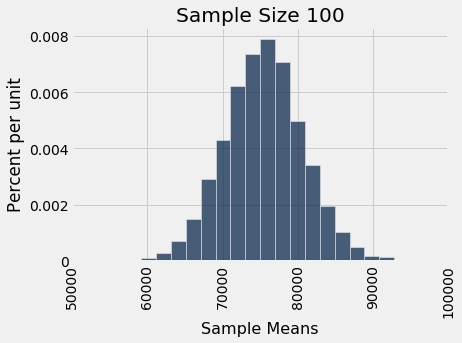

In [42]:
simulate_sample_mean(salaries, 'salary', 100, 10000)
plots.xlim(50000, 100000);

What did you notice about the sample means of the four bootstrapped samples above? Discuss with your neighbors. If you're unsure of your conclusion, ask your TA.

**Question 2.6.** Let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Assign the variable `pop_vs_sample` to a list of integer(s) that correspond to true statement(s).

1. Sample SD gets smaller with increasing sample size.
2. Sample SD gets larger with increasing sample size.
3. Sample SD becomes more consistent with population SD with increasing sample size.
4. SD of sample means gets smaller with increasing sample size.
5. SD of sample means gets larger with increasing sample size.
6. SD of sample means stays the same with increasing sample size.

<!--
BEGIN QUESTION
name: q2_6
-->

In [45]:
pop_vs_sample = [3,4]

In [46]:
ok.grade("q2_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Run the following three cells multiple times and examine how the sample SD and the SD of sample means change with sample size.

The first histogram is of the sample; the second histogram is the distribution of sample means with that particular sample size. Adjust the bins as necessary.

Sample SD:  30894.534976741583
Sample size:  10
Population mean: 75463.91814023031
Average of sample means:  74682.91580199999
Population SD: 51697.0349864653
SD of sample means: 16017.633608016884


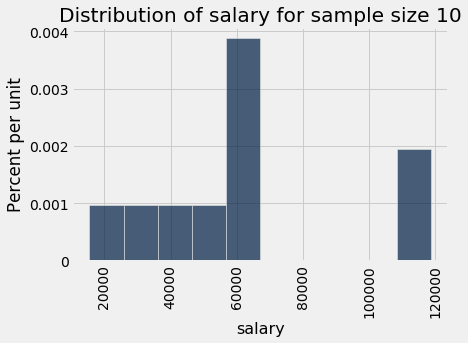

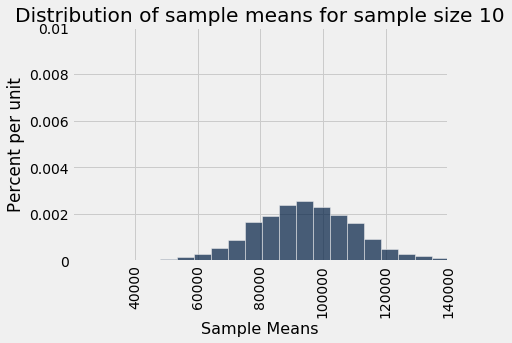

In [47]:
sample_10 = salaries.sample(10)
sample_10.hist("salary")
plots.title('Distribution of salary for sample size 10')
print("Sample SD: ", np.std(sample_10.column("salary")))
simulate_sample_mean(salaries, 'salary', 10, 1000)
plots.xlim(5,120000);
plots.ylim(0, .0001);
plots.title('Distribution of sample means for sample size 10');

Sample SD:  55893.37031987198
Sample size:  200
Population mean: 75463.91814023031
Average of sample means:  75276.06620550001
Population SD: 51697.0349864653
SD of sample means: 3597.2808178253526


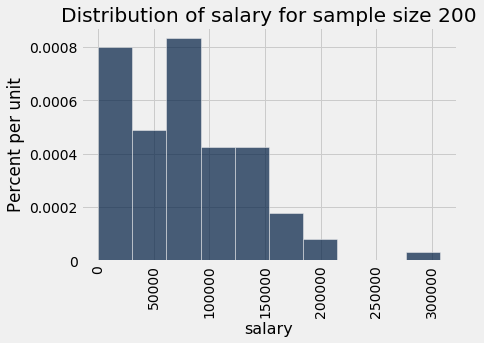

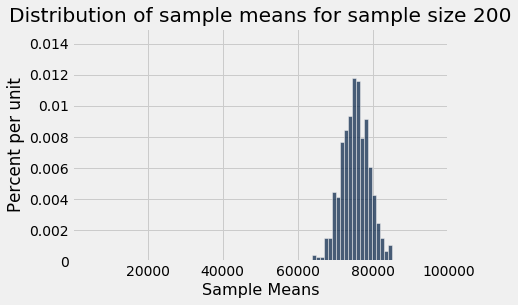

In [48]:
sample_200 = salaries.sample(200)
sample_200.hist("salary")
plots.title('Distribution of salary for sample size 200')
print("Sample SD: ", np.std(sample_200.column("salary")))
simulate_sample_mean(salaries, 'salary', 200, 1000)
plots.xlim(5,100000)
plots.ylim(0, .00015);
plots.title('Distribution of sample means for sample size 200');

Sample SD:  50810.18844242139
Sample size:  1000
Population mean: 75463.91814023031
Average of sample means:  75513.01613979
Population SD: 51697.0349864653
SD of sample means: 1714.1220269848332


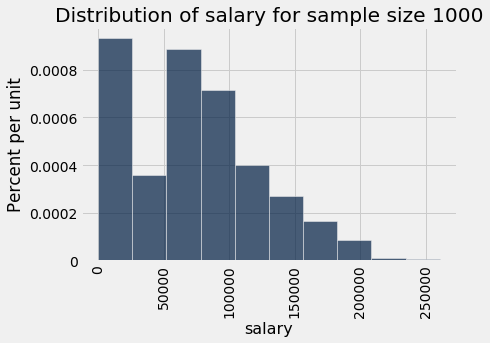

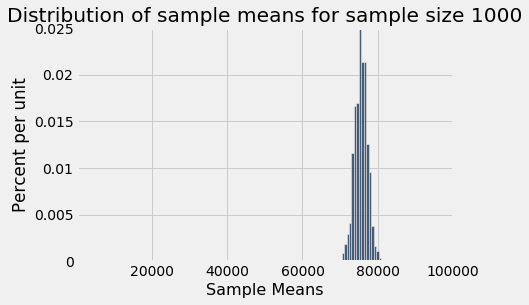

In [52]:
sample_1000 = salaries.sample(1000)
sample_1000.hist("salary")
plots.title('Distribution of salary for sample size 1000')
print("Sample SD: ", np.std(sample_1000.column("salary")))
simulate_sample_mean(salaries, 'salary', 1000, 1000)
plots.xlim(5,100000)
plots.ylim(0, .00025);
plots.title('Distribution of sample means for sample size 1000');

Let's illustrate these trends. Below, you will see how the average absolute error of sample SD from the population SD changes with sample size (N).

In [53]:
# Don't change this cell, just run it!
pop_sd = np.std(salaries.column('salary'))
sample_n_errors = make_array()
for i in np.arange(10, 200, 10):
    sample_n_errors = np.append(sample_n_errors, np.average([abs(np.std(salaries.sample(i).column("salary"))-pop_sd)
                                                      for d in np.arange(100)]))
Table().with_column("Average absolute error in SD", sample_n_errors, "N", np.arange(10, 200, 10)).plot("N", "Average absolute error in SD")

TypeError: with_column() takes from 3 to 4 positional arguments but 5 were given

The next cell shows how the SD of the sample means changes relative to the sample size (N).

In [51]:
# Don't change this cell, just run it!
def sample_means(sample_size):
    means = make_array()
    for i in np.arange(1000):
        sample = salaries.sample(sample_size).column('salary')
        means = np.append(means, np.mean(sample))
    return np.std(means)

sample_mean_SDs = make_array()
for i in np.arange(50, 1000, 100):
    sample_mean_SDs = np.append(sample_mean_SDs, sample_means(i))
Table().with_column("SD of sample means", sample_mean_SDs, "N", np.arange(50, 1000, 100))\
.plot("N", "SD of sample means")

TypeError: with_column() takes from 3 to 4 positional arguments but 5 were given

You should notice that the distribution of means gets narrower and spikier, and that the distribution of the sample increasingly looks like the distribution of the population as we get to larger sample sizes. 

**Question 2.7.** Is there a relationship between the sample size and absolute error in standard deviation? What about the sample size and the standard deviation of the sample mean? Assign `q2_7` to the number corresponding to the statements that answer these two questions.

1. The average absolute error in SD decreases roughly linearly with sample size. The SD of the sample means is inversely proportional to the square root of sample size.
2. The average absolute error in SD decreases roughly linearly with sample size. The SD of the sample means is directly proportional to the square root of sample size.
3. The average absolute error in SD decreases roughly exponentially with sample size. The SD of the sample means is inversely proportional to the square root of sample size.
4. The average absolute error in SD decreases roughly exponentially with sample size. The SD of the sample means is directly proportional to the square root of sample size.

<!--
BEGIN QUESTION
name: q2_7
-->

In [127]:
q2_7 = .

In [ ]:
ok.grade("q2_7");

That's it! You've completed Lab 8. There weren't many tests, but there were a lot of points at which you should've stopped and understood exactly what was going on. Consult the textbook or ask your GSI if you have any other questions!

Be sure to 
- **run all the tests** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **run the last cell to submit your work**,
- and ask one of the staff members to check you off.

In [51]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
val = lambda q: q.startswith('q1') or q.startswith('q2_3') or q.startswith('q2_4')
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if val(q)]
print("Finished running all tests.")

In [ ]:
# Run this cell to submit your work *after* you have passed all of the test cells.
# It's ok to run this cell multiple times. Only your final submission will be scored.

_ = ok.submit()